
# Análisis y Pronóstico de Datos Meteorológicos

Este cuaderno analiza datos meteorológicos del conjunto de datos RedMET, enfocándose en métricas clave como la humedad, la temperatura, la dirección del viento y la velocidad del viento. El objetivo es limpiar y preparar los datos para el análisis, realizar un análisis exploratorio de datos (EDA) y usar Prophet para pronosticar tendencias futuras.

**Fuente**: [RedMET Dataset](https://datos.cdmx.gob.mx/dataset/redmet)


In [1]:

# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure the plots to display in the notebook
%matplotlib inline
sns.set_theme(style='whitegrid')


In [2]:

# Load the CSV file into a DataFrame
df = pd.read_csv('redmet_2023_06.csv')

# Rename columns for easier access and analysis
df = df.rename(columns={
    'fecha': 'date',
    'RH': 'humidity',
    'TMP': 'temperature',
    'WSP': 'wind_speed',
    'WDR': 'wind_direction'
})


In [3]:

# Display the first few rows of the DataFrame for an initial view
print("Initial view of the data:")
df.head()


Initial view of the data:


,date,humidity,temperature,wind_direction,wind_speed
0,2016-01-01,60.565476,13.385714,156.723039,1.933333
1,2016-01-02,52.452381,13.567262,176.710784,2.559804
2,2016-01-03,55.763636,13.893333,190.830846,2.136318
3,2016-01-04,62.776786,12.536012,196.306373,2.592647
4,2016-01-05,70.271845,9.070227,266.889764,2.963517


In [4]:

# General summary of the DataFrame (to see data types, null values, etc.)
print("\nDataFrame summary:")
df.info()



DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3073 non-null   object 
 1   humidity        3073 non-null   float64
 2   temperature     3073 non-null   float64
 3   wind_direction  3073 non-null   float64
 4   wind_speed      3073 non-null   float64
dtypes: float64(4), object(1)
memory usage: 120.2+ KB


In [5]:

# Check for null values
print("\nNumber of null values per column:")
print(df.isnull().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Normalize column names (remove spaces, convert to lowercase, etc.)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Filter humidity values to ensure they are within a logical range (0-100%)
df = df[(df['humidity'] >= 0) & (df['humidity'] <= 100)]

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and season
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['season'] = df['date'].dt.month % 12 // 3 + 1  # Season calculation
# Asignar nombres a las estaciones
df['season'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Ensure the data is sorted by date
df = df.sort_values(by='date').set_index('date')



Number of null values per column:
date              0
humidity          0
temperature       0
wind_direction    0
wind_speed        0
dtype: int64



## Análisis Exploratorio de Datos (EDA)

En esta sección, exploramos la distribución y las relaciones de las variables meteorológicas clave.


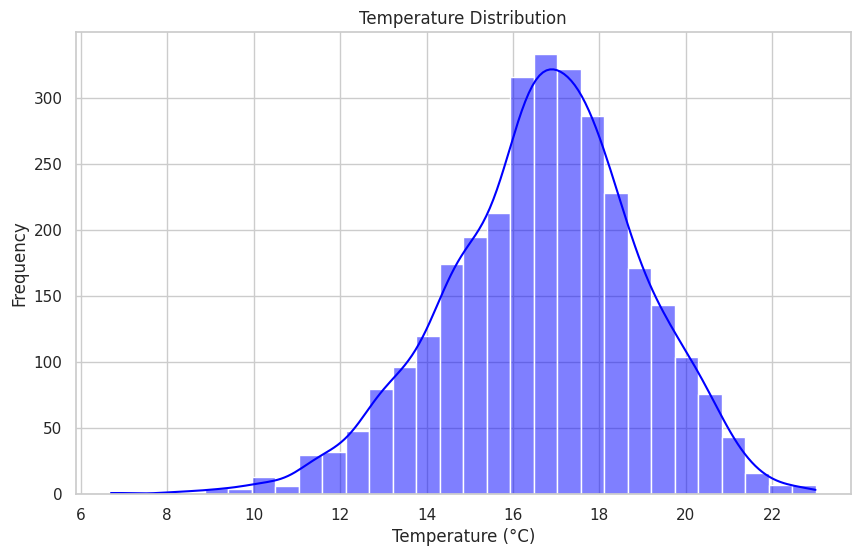

In [6]:

# Plot the distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], bins=30, kde=True, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


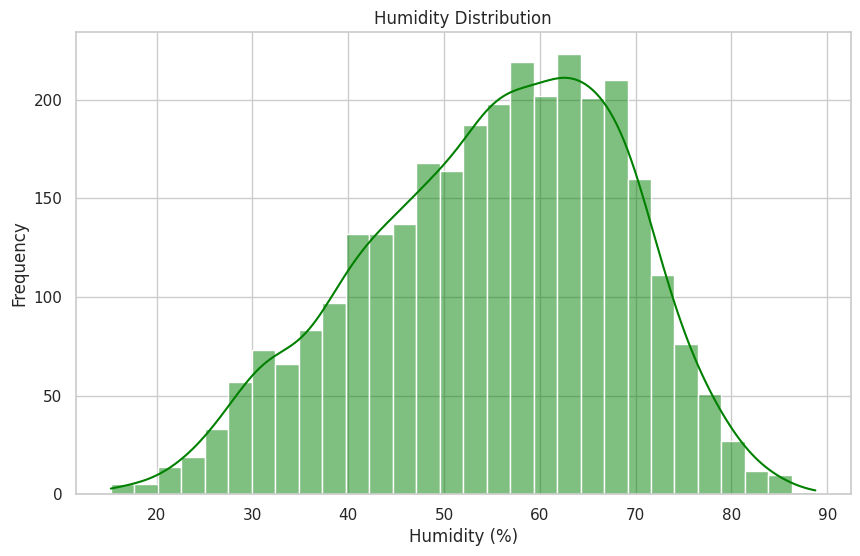

In [7]:

# Plot the distribution of humidity
plt.figure(figsize=(10, 6))
sns.histplot(df['humidity'], bins=30, kde=True, color='green')
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()


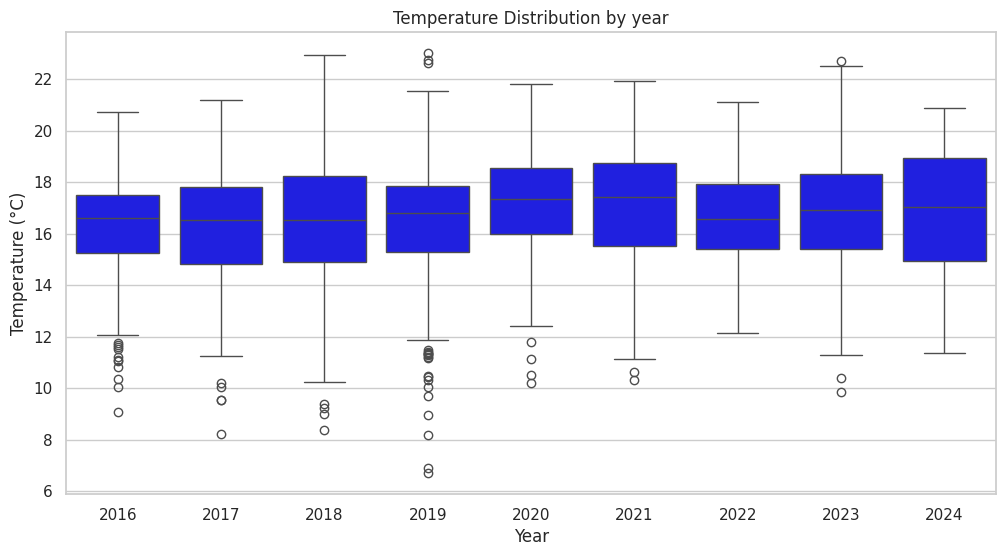

In [8]:
# Boxplot of Temperature Distribution by year
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='temperature', color='blue')
plt.title('Temperature Distribution by year')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

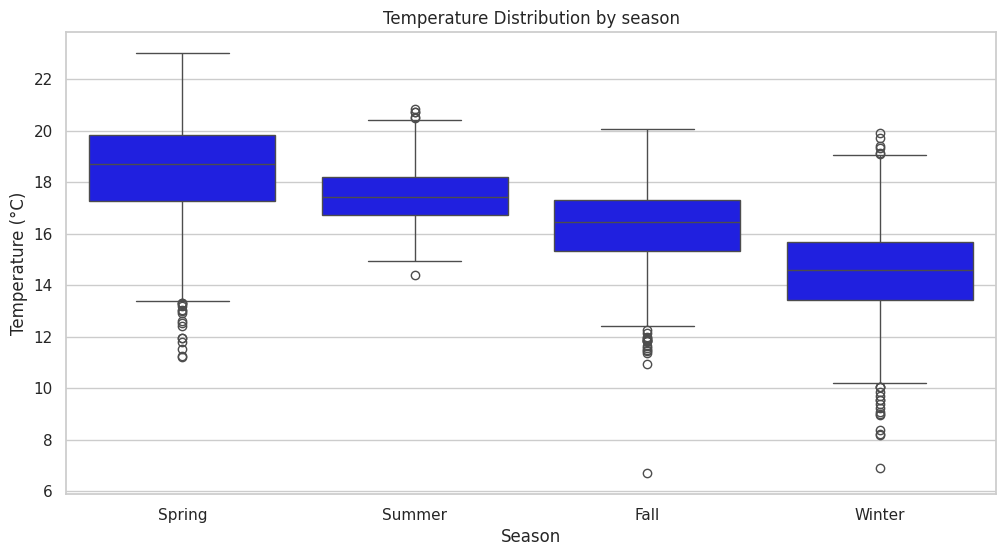

In [9]:
# Boxplot of temperature Distribution by season
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='season', y='temperature', order=['Spring', 'Summer', 'Fall','Winter'], color='blue')
plt.title('Temperature Distribution by season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.show()

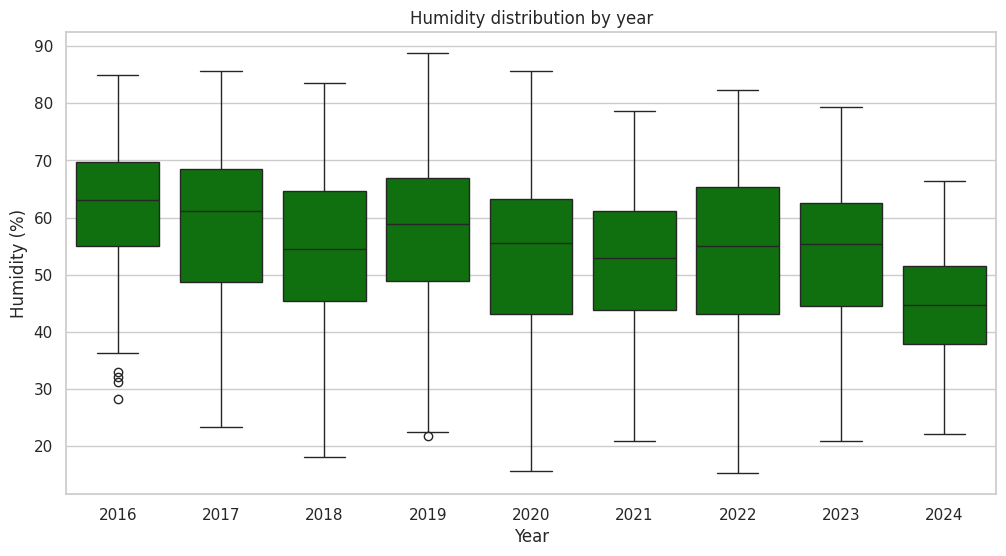

In [10]:
# Boxplot of Humidity distribution by year
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='humidity', color='green')
plt.title('Humidity distribution by year')
plt.xlabel('Year')
plt.ylabel('Humidity (%)')
plt.show()


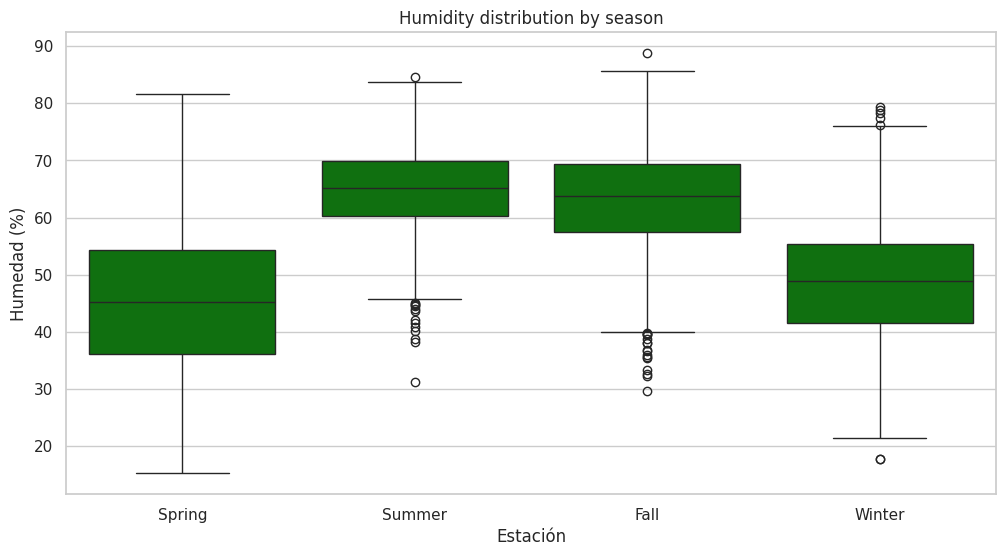

In [11]:
# Boxplot of Humidity distribution by season
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='season', y='humidity', order=['Spring', 'Summer', 'Fall','Winter'], color='green')
plt.title('Humidity distribution by season')
plt.xlabel('Estación')
plt.ylabel('Humedad (%)')
plt.show()

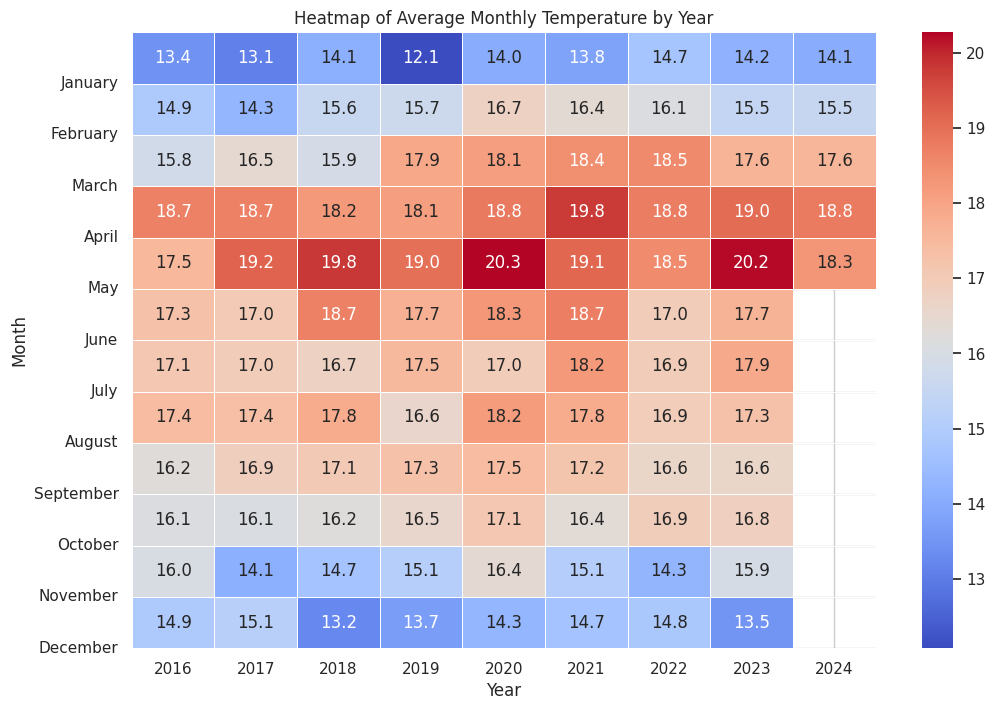

In [12]:
# Create a pivot table for temperature
temperature_table = df.pivot_table(values='temperature', index='month', columns='year', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(temperature_table, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5)

# Set titles and labels
plt.title('Heatmap of Average Monthly Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Month')

# Adjust the month names if desired
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
plt.yticks(ticks=range(1, 13), labels=months, rotation=0)

plt.show()

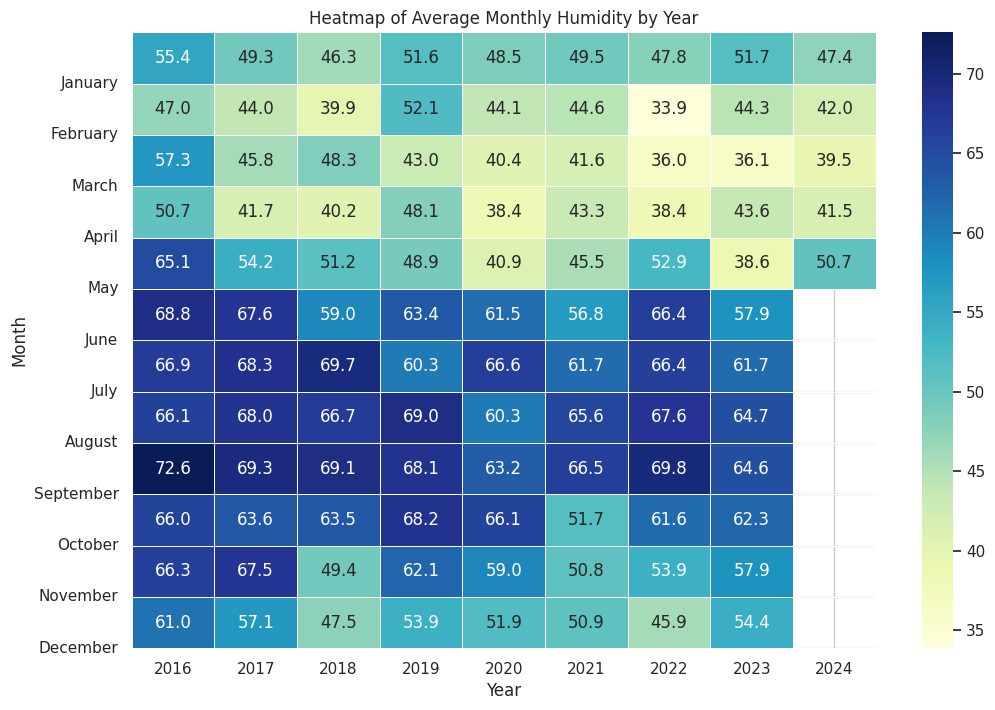

In [13]:
# Create a pivot table for humidity
humidity_table = df.pivot_table(values='humidity', index='month', columns='year', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(humidity_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)

# Set titles and labels
plt.title('Heatmap of Average Monthly Humidity by Year')
plt.xlabel('Year')
plt.ylabel('Month')

# Adjust the month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
plt.yticks(ticks=range(1, 13), labels=months, rotation=0)

plt.show()


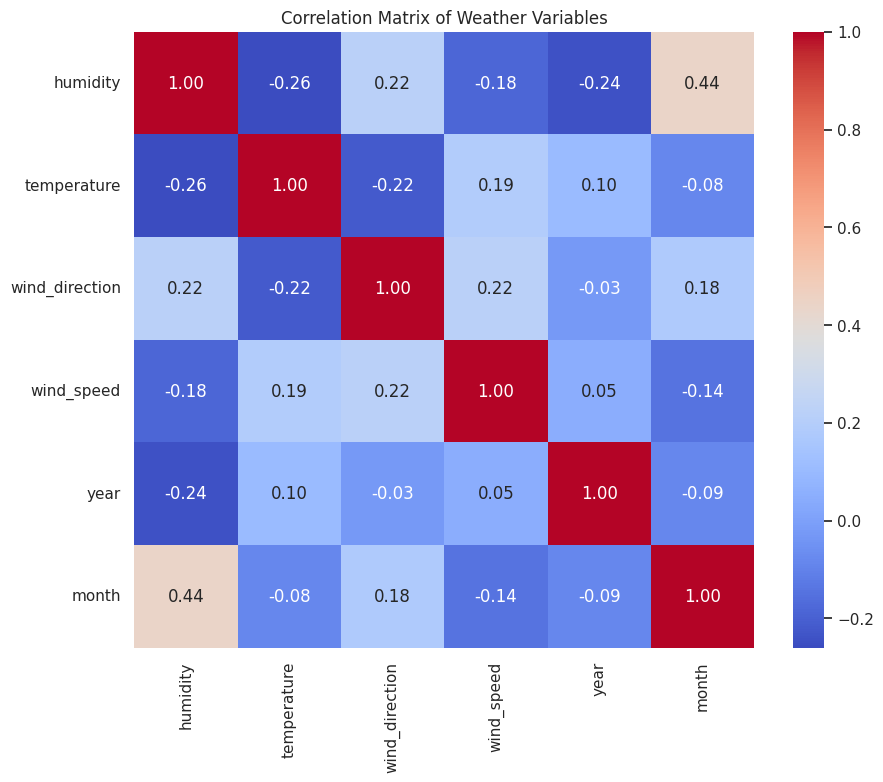

In [14]:
# Calculate and display the correlation matrix for the selected columns
selected_columns = ['humidity', 'temperature', 'wind_direction', 'wind_speed', 'year', 'month']
plt.figure(figsize=(10, 8))
correlation_matrix = df[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Variables')
plt.show()



## Análisis de Series Temporales

Visualizaremos las tendencias de la temperatura y la humedad a lo largo del tiempo para entender cómo cambian estas variables.


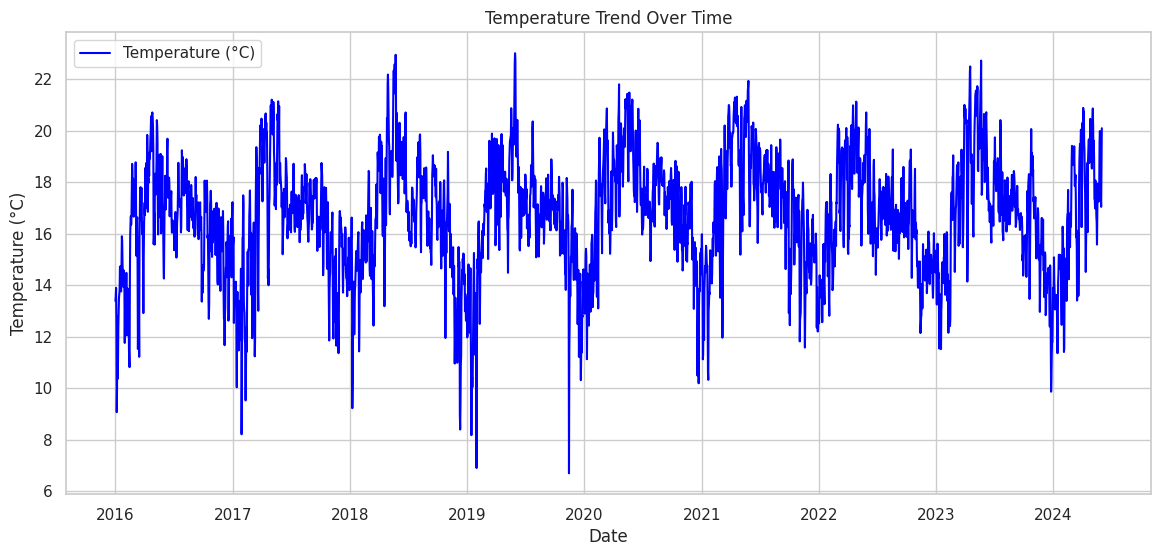

In [15]:

# Plot the temperature trend over time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature'], label='Temperature (°C)', color='blue')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


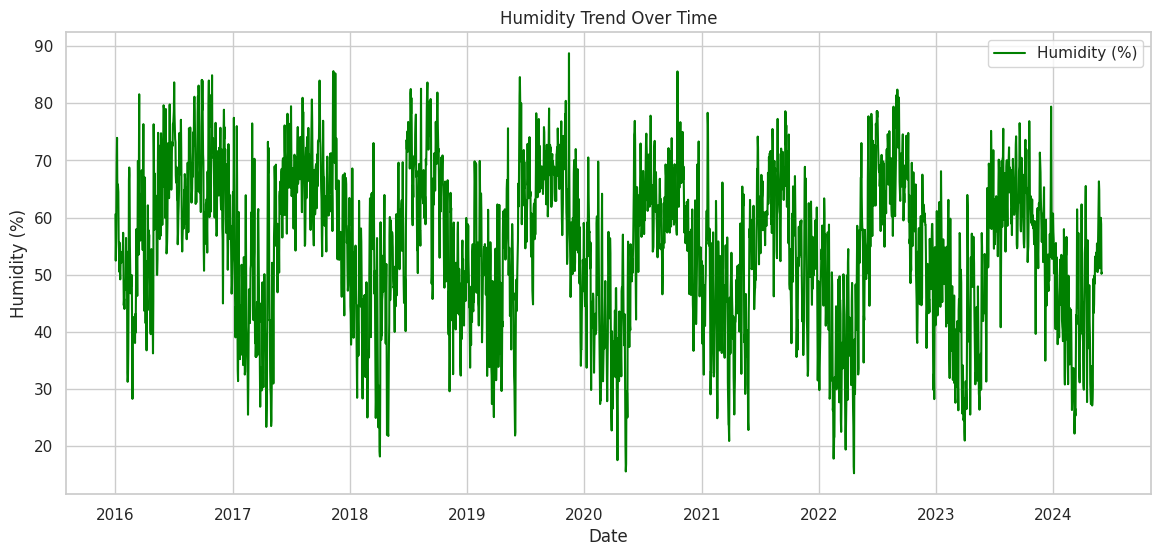

In [16]:

# Plot the humidity trend over time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['humidity'], label='Humidity (%)', color='green')
plt.title('Humidity Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.show()



## Pronóstico con Prophet

Usaremos el modelo Prophet para pronosticar la temperatura y la humedad para los próximos 180 días.


In [17]:

# Prepare data for Prophet
df_temperature_prophet = df[['temperature']].reset_index()
df_temperature_prophet.columns = ['ds', 'y']

df_humidity_prophet = df[['humidity']].reset_index()
df_humidity_prophet.columns = ['ds', 'y']


In [18]:

# Function to train and forecast using Prophet
from prophet import Prophet

def prophet_forecast(data, periods=180):
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast


/home/hirian/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


23:55:01 - cmdstanpy - INFO - Chain [1] start processing
23:55:01 - cmdstanpy - INFO - Chain [1] done processing


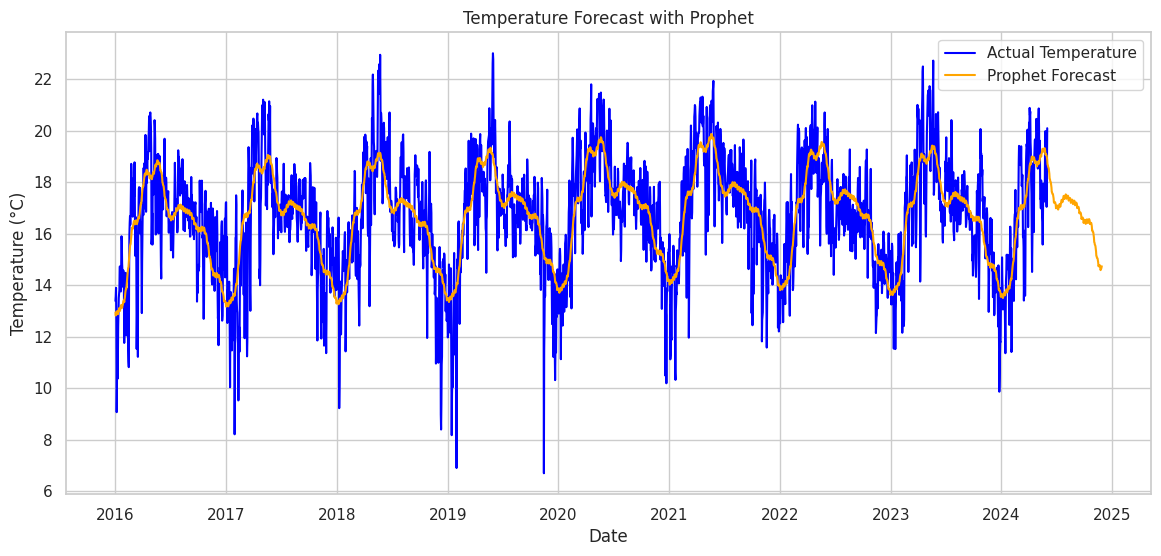

In [19]:

# Forecast temperature
forecast_temperature = prophet_forecast(df_temperature_prophet)
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature'], label='Actual Temperature', color='blue')
plt.plot(forecast_temperature['ds'], forecast_temperature['yhat'], label='Prophet Forecast', color='orange')
plt.title('Temperature Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


23:55:02 - cmdstanpy - INFO - Chain [1] start processing
23:55:02 - cmdstanpy - INFO - Chain [1] done processing


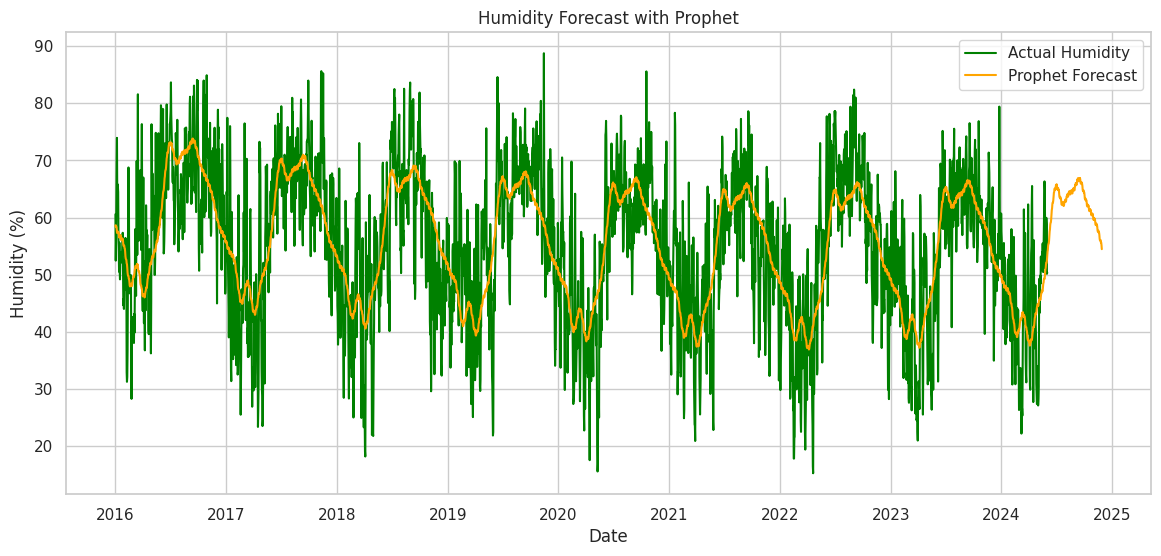

In [20]:

# Forecast humidity
forecast_humidity = prophet_forecast(df_humidity_prophet)
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['humidity'], label='Actual Humidity', color='green')
plt.plot(forecast_humidity['ds'], forecast_humidity['yhat'], label='Prophet Forecast', color='orange')
plt.title('Humidity Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.show()



## Resumen y Conclusiones

- Visualizamos las distribuciones y tendencias de la temperatura y la humedad a lo largo del tiempo.
- Usando Prophet, pronosticamos la temperatura y la humedad para los próximos 180 días.
- Los pronósticos brindan información sobre posibles tendencias futuras, lo que podría ser útil para la planificación y el análisis.

### Próximos Pasos
- Mejorar el modelo ajustando parámetros y agregando estacionalidad personalizada si es necesario.
- Explorar variables adicionales para un análisis más completo.
